In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [4]:
def smart_money_RSV(df, window=20):
    """
    聪明钱RSV：结合taker买卖量识别机构资金流向
    金融原理：机构订单流对价格有持续影响
    """
    # 计算净taker流量
    df['net_taker_flow'] = (df['taker_buy_volume'] - 
                           (df['volume'] - df['taker_buy_volume']))
    
    # 计算资金流加权价格
    money_flow = df['close'] * df['net_taker_flow']
    avg_money_flow = money_flow.rolling(window).sum() / df['net_taker_flow'].rolling(window).sum()
    
    # 计算聪明钱价格区间
    smart_low = (df['low'] * df['taker_buy_volume']).rolling(window).sum() / df['taker_buy_volume'].rolling(window).sum()
    smart_high = (df['high'] * (df['volume'] - df['taker_buy_volume'])).rolling(window).sum() / (df['volume'] - df['taker_buy_volume']).rolling(window).sum()
    
    # 计算聪明钱RSV
    denominator = smart_high - smart_low + 1e-12
    return (avg_money_flow - smart_low) / denominator

# 测试因子表现


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): -0.003286
   Rank_IC (Spearman): -0.012953
📊 信息比率:
   IR: -0.501329
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130938
   因子列: smart_money_RSV
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


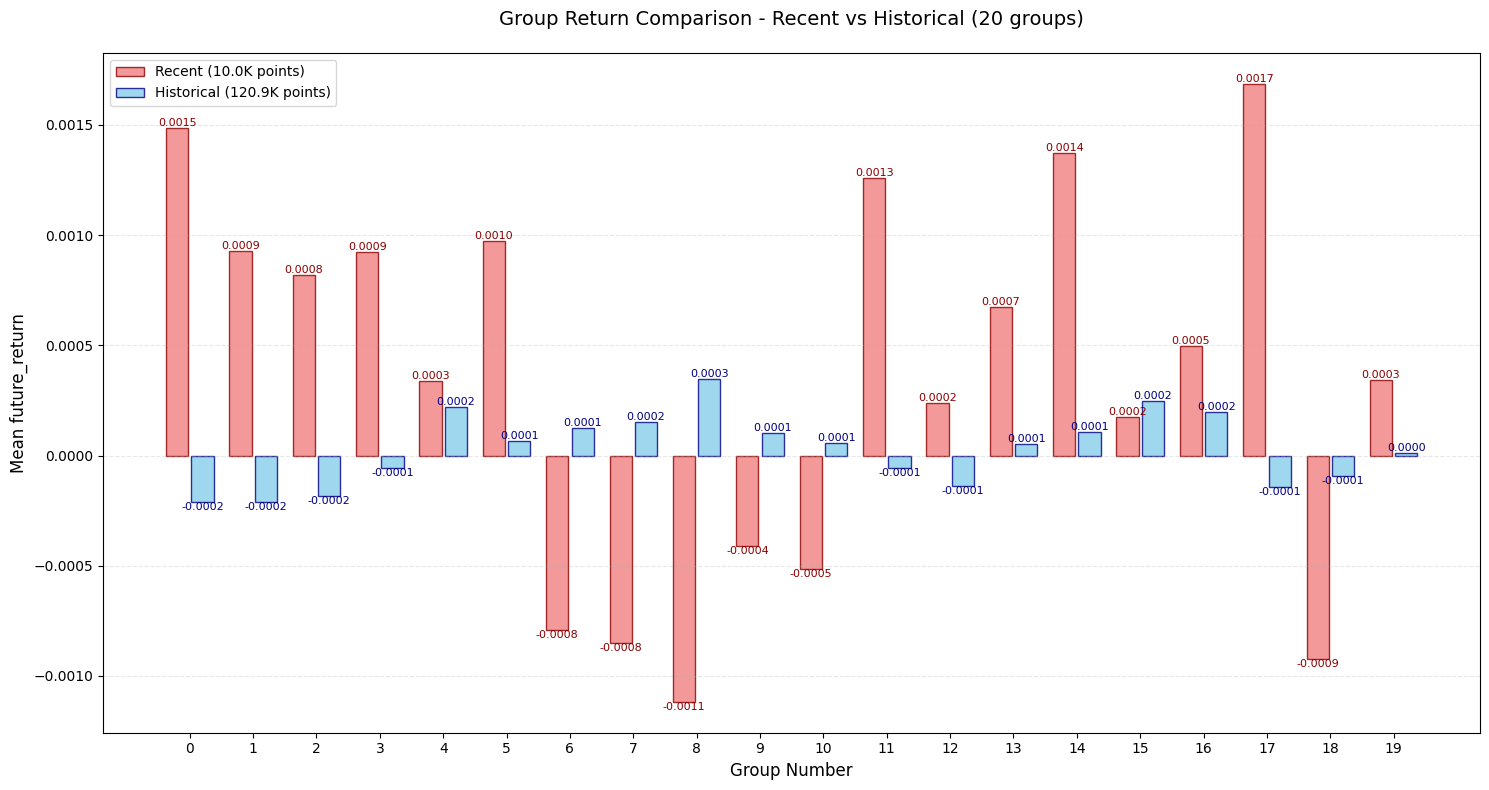

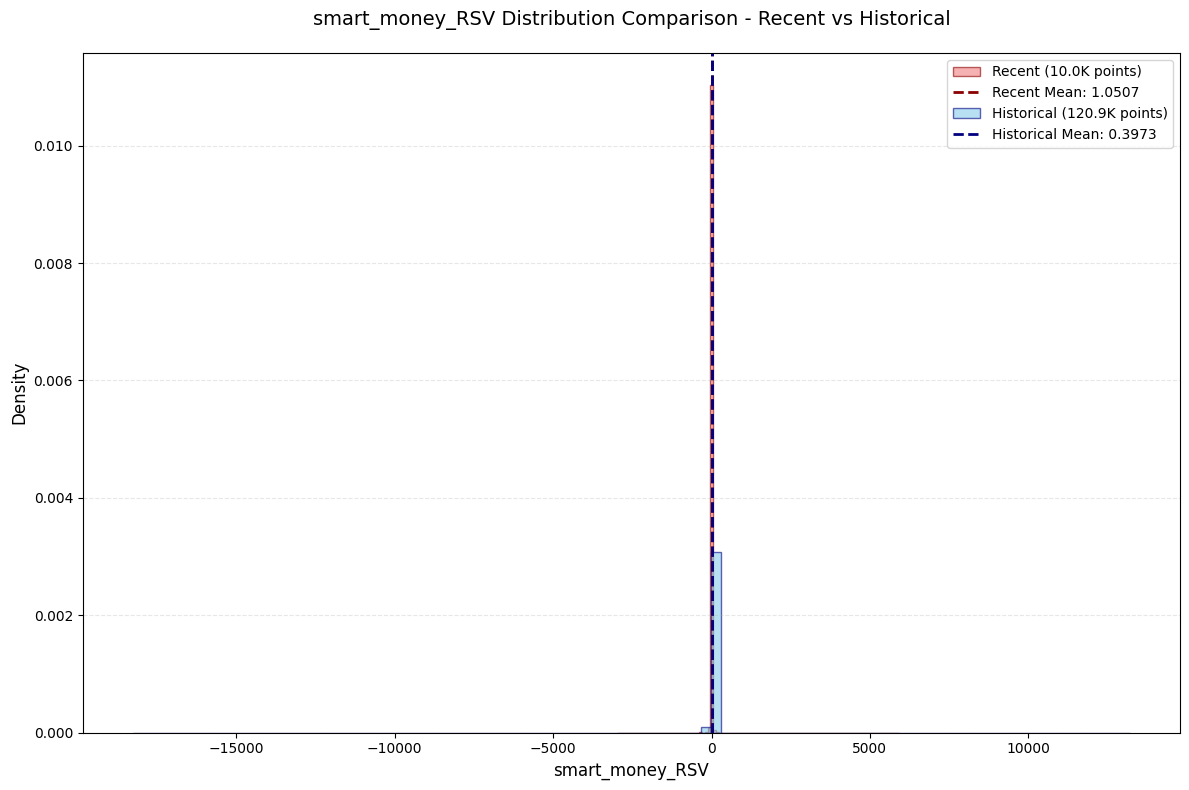

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [5]:
evaluator.set_factor(
    factor_func=smart_money_RSV,
    factor_name='smart_money_RSV'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

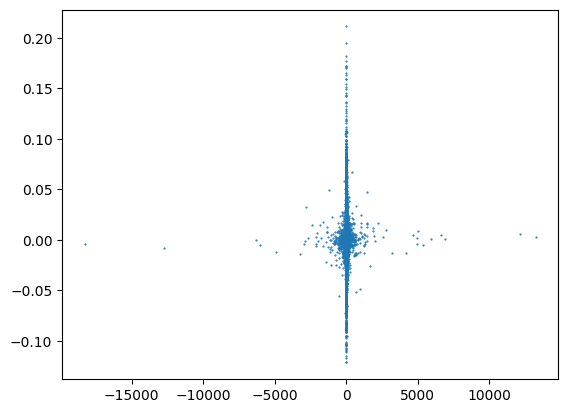

In [6]:
import matplotlib.pyplot as plt
plt.scatter(smart_money_RSV(df),df['close'].pct_change(-10), s=0.3)

In [7]:
result['information_ratio']['group_correlations']

[-0.008601167930827271,
 0.0026644815581310915,
 -0.003082805910348539,
 -0.0052295552352139155,
 -0.006713850080649978,
 0.0005981865788298157,
 0.006286674418972689,
 0.003757900710781974,
 -0.008822105447793759,
 -0.007301151466368506]

In [8]:
print(result)

{'correlation_analysis': {'IC': -0.003285994747802321, 'Rank_IC': -0.012953242442362416}, 'information_ratio': {'IR': -0.501328977323172, 'group_correlations': [-0.008601167930827271, 0.0026644815581310915, -0.003082805910348539, -0.0052295552352139155, -0.006713850080649978, 0.0005981865788298157, 0.006286674418972689, 0.003757900710781974, -0.008822105447793759, -0.007301151466368506], 'n_groups': 10}, 'group_analysis': {'group_stats':           val_min    val_max  val_mean  return_mean  return_std  count
group                                                                 
0     -18275.3390    -6.1609  -49.3225      -0.0001      0.0110   6547
1         -6.1607    -2.8275   -4.1561      -0.0001      0.0109   6547
2         -2.8274    -1.6828   -2.1817      -0.0001      0.0111   6547
3         -1.6828    -1.0953   -1.3621       0.0000      0.0112   6547
4         -1.0953    -0.7233   -0.8981       0.0002      0.0115   6547
5         -0.7232    -0.4503   -0.5800       0.0001      0.01